In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

# suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('./classification_data/data.csv', header=None)
df.columns = ['x1', 'x2', 'c']
df.head()

,x1,x2,c
0,16.263398,13.299206,r
1,0.775408,23.986692,r
2,29.170503,-3.287474,r
3,6.739044,-28.033329,r
4,3.216100,22.013695,r


In [3]:
df['c'].unique()

array(['r', 'g', 'b'], dtype=object)

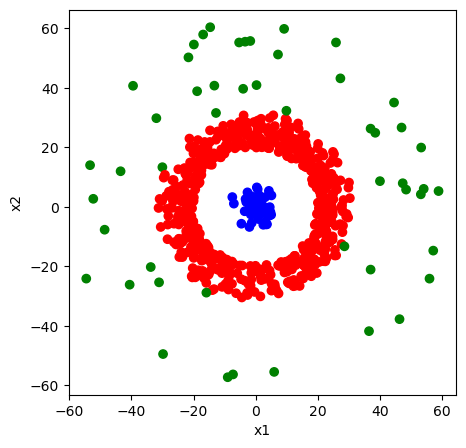

In [4]:
# plot the data
plt.figure(figsize=(5, 5))
plt.scatter(df['x1'], df['x2'], c=df['c'])
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

### Find the simplest neural net

Use different activations, number of layers, number of neurons at each layer, compare
their performance and find the simplest neural net. There could be couple of networks that
are fairly close in terms of the performance choose anyone you think has the least complexity
and explain your reasoning.

In [5]:
def prep_data(df, cols='all'):
    if cols != 'all':
        df = df[cols]

    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values

    # Convert string labels to integer labels
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)  

    # Convert encoded labels to categorical (one-hot encoding for 3 classes)
    y_categorical = to_categorical(y_encoded, num_classes=3)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y_categorical, test_size=0.2, random_state=42)

    # Standardize or normalize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = prep_data(df)

In [6]:
# Plot the training history
def plot_history(history, neurons):
    plt.figure(figsize=(12, 4))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Accuracy for {neurons} Neurons')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Loss for {neurons} Neurons')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()



Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.3722 - loss: 1.1100 - val_accuracy: 0.7226 - val_loss: 1.0301
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8102 - loss: 1.0110 - val_accuracy: 0.8686 - val_loss: 0.9276
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8497 - loss: 0.9223 - val_accuracy: 0.8686 - val_loss: 0.8271
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8575 - loss: 0.8285 - val_accuracy: 0.8686 - val_loss: 0.7257
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8641 - loss: 0.7418 - val_accuracy: 0.8686 - val_loss: 0.6351
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8426 - loss: 0.6671 - val_accuracy: 0.8686 - val_loss: 0.5719
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8398 - loss: 0.6448 - val_accuracy: 0.8686 - val_loss: 0.5325
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8505 - loss: 0.6009 - val_accuracy: 0.8686 - val_loss

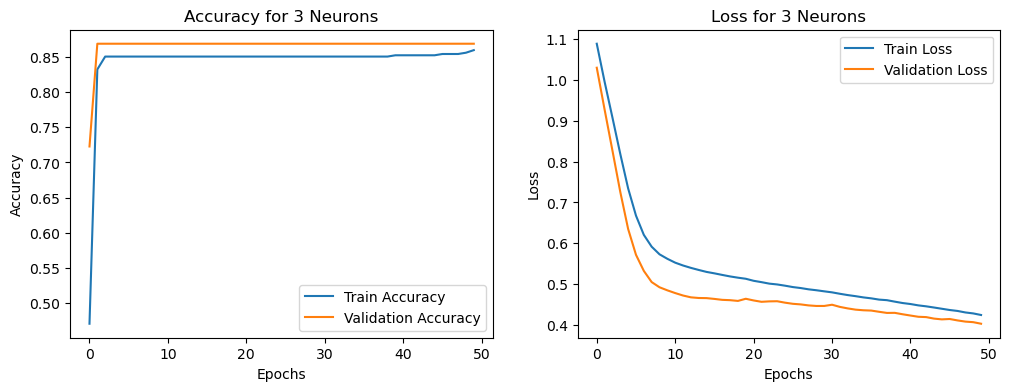

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.4591 - loss: 0.9725 - val_accuracy: 0.8686 - val_loss: 0.8037
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8463 - loss: 0.8017 - val_accuracy: 0.8686 - val_loss: 0.6652
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8578 - loss: 0.6970 - val_accuracy: 0.8686 - val_loss: 0.5836
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8424 - loss: 0.6701 - val_accuracy: 0.8686 - val_loss: 0.5266
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8352 - loss: 0.6245 - val_accuracy: 0.8686 - val_loss: 0.4918
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8474 - loss: 0.5748 - val_accuracy: 0.8686 - val_loss: 0.4756
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8373 - loss: 0.5728 - val_accuracy: 0.8686 - val_loss: 0.4605
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8546 - loss: 0.5234 - val_accuracy: 0.8686 - val_loss

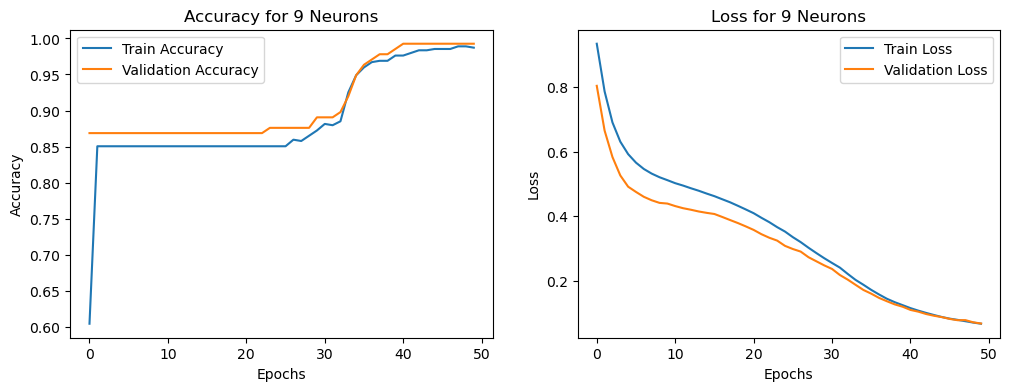

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.1796 - loss: 1.1357 - val_accuracy: 0.8686 - val_loss: 0.9093
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8474 - loss: 0.8860 - val_accuracy: 0.8686 - val_loss: 0.7015
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8343 - loss: 0.7320 - val_accuracy: 0.8686 - val_loss: 0.5614
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8541 - loss: 0.5876 - val_accuracy: 0.8686 - val_loss: 0.4883
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8571 - loss: 0.5500 - val_accuracy: 0.8686 - val_loss: 0.4652
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8376 - loss: 0.5744 - val_accuracy: 0.8686 - val_loss: 0.4542
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8369 - loss: 0.5678 - val_accuracy: 0.8686 - val_loss: 0.4494
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8784 - loss: 0.4709 - val_accuracy: 0.8686 - val_loss

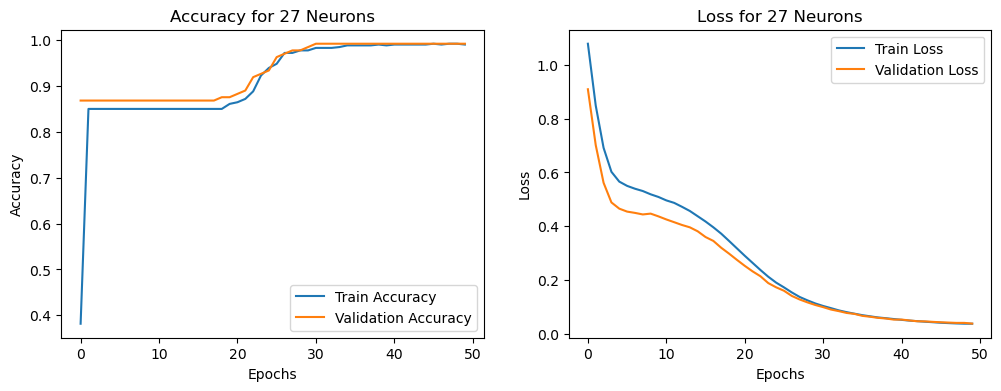

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.1853 - loss: 1.2692 - val_accuracy: 0.8248 - val_loss: 0.9208
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8373 - loss: 0.8590 - val_accuracy: 0.8686 - val_loss: 0.6579
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8344 - loss: 0.6849 - val_accuracy: 0.8686 - val_loss: 0.5129
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8445 - loss: 0.5810 - val_accuracy: 0.8686 - val_loss: 0.4581
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8438 - loss: 0.5618 - val_accuracy: 0.8686 - val_loss: 0.4428
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8632 - loss: 0.4783 - val_accuracy: 0.8686 - val_loss: 0.4373
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8473 - loss: 0.5088 - val_accuracy: 0.8686 - val_loss: 0.4300
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8564 - loss: 0.4714 - val_accuracy: 0.8686 - val_loss

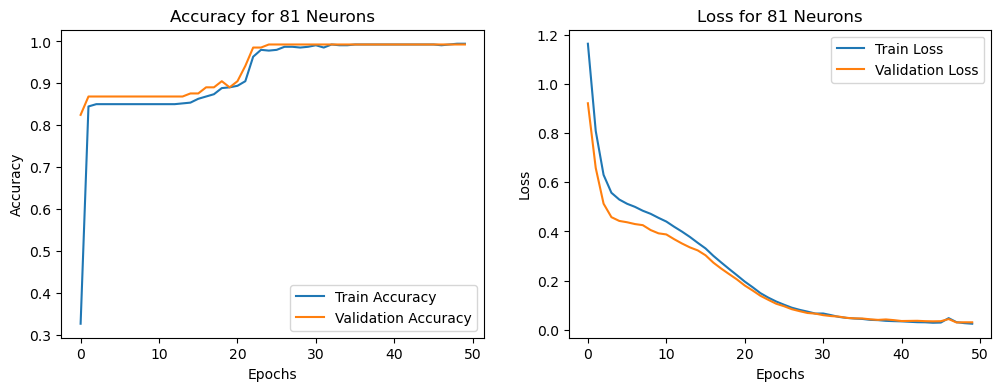

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5750 - loss: 0.9972 - val_accuracy: 0.8686 - val_loss: 0.6696
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8400 - loss: 0.6632 - val_accuracy: 0.8686 - val_loss: 0.4734
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8584 - loss: 0.5494 - val_accuracy: 0.8686 - val_loss: 0.4549
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8464 - loss: 0.5442 - val_accuracy: 0.8686 - val_loss: 0.4529
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8667 - loss: 0.4863 - val_accuracy: 0.8686 - val_loss: 0.4471
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8519 - loss: 0.4855 - val_accuracy: 0.8686 - val_loss: 0.4376
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8556 - loss: 0.4759 - val_accuracy: 0.8686 - val_loss: 0.4363
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8453 - loss: 0.4893 - val_accuracy: 0.8686 - val_loss

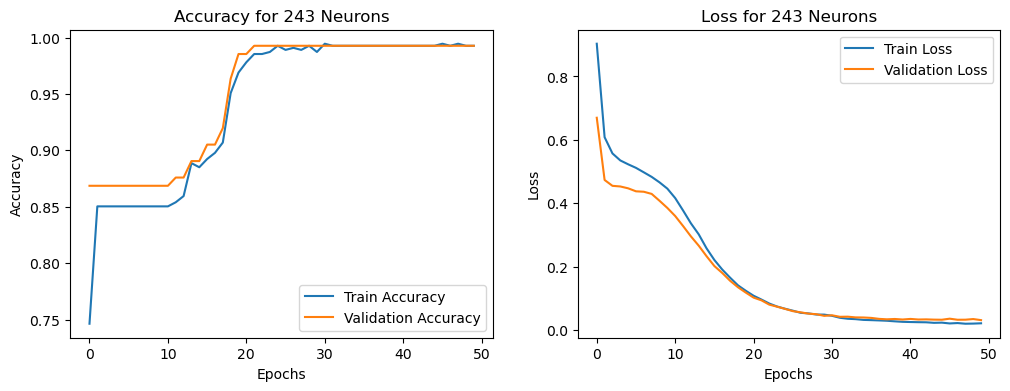

In [16]:
def build_model(input_shape, neurons=16, activation='relu', output_classes=3):
    model = models.Sequential()
    
    model.add(layers.InputLayer(input_shape=(input_shape,)))  
    model.add(layers.Dense(neurons, activation=activation))

    # add a new layer
    model.add(layers.Dense(40, activation=activation))

    # Softmax for multi-class classification
    model.add(layers.Dense(output_classes, activation='softmax'))
    
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Get the input shape
input_shape = X_train.shape[1]

# Train with different number of neurons
n_neurons = [3, 9, 27, 81, 243]

# save performance for each number of neurons
performance = defaultdict(dict)

for n in n_neurons:
    model = build_model(input_shape=input_shape, neurons=n, activation='relu', output_classes=3)

    # Train the model
    history_two_features = model.fit(
        X_train, 
        y_train, 
        validation_data=(X_test, y_test), 
        epochs=50, 
        batch_size=32, 
        # callbacks=[early_stopping]
    )

    # Evaluate the model
    val_loss, val_acc = model.evaluate(X_test, y_test)
    print(f'Validation Accuracy: {val_acc:.4f}')

    # Save the performance
    performance[n]['val_loss'] = val_loss
    performance[n]['val_acc'] = val_acc

    # Plot the history
    plot_history(history_two_features, neurons=n)

In [17]:
performance

defaultdict(dict,
            {3: {'val_loss': 0.4030705392360687,
              'val_acc': 0.8686131238937378},
             9: {'val_loss': 0.06877809762954712,
              'val_acc': 0.9927007555961609},
             27: {'val_loss': 0.037680864334106445,
              'val_acc': 0.9927007555961609},
             81: {'val_loss': 0.030840933322906494,
              'val_acc': 0.9927007555961609},
             243: {'val_loss': 0.031484976410865784,
              'val_acc': 0.9927007555961609}})

### Build new features

In [18]:
# create new features
df['x3'] = df['x1']**2
df['x4'] = df['x2']**2
df['x5'] = df['x1'] * df['x2']

# put column 'c' at the end
df = df[['x1', 'x2', 'x3', 'x4', 'x5', 'c']]
df.head()

,x1,x2,x3,x4,x5,c
0,16.263398,13.299206,264.498124,176.868878,216.290282,r
1,0.775408,23.986692,0.601257,575.361405,18.599466,r
2,29.170503,-3.287474,850.918251,10.807487,-95.897279,r
3,6.739044,-28.033329,45.414707,785.867535,-188.917824,r
4,3.216100,22.013695,10.343297,484.602776,70.798239,r


In [19]:
scenarios = {
    'x3_x4': ['x3', 'x4', 'c'],
    'x3_x5': ['x3', 'x5', 'c'],
    'x3_x4_x5': ['x3', 'x4', 'x5', 'c'],
    'x1_x2_x3_x4_x5': ['x1', 'x2', 'x3', 'x4', 'x5', 'c']
}
# from the previous experiment
n_neurons = 27 

performance = defaultdict(dict)
for scenario, cols in scenarios.items():
    X_train, X_test, y_train, y_test = prep_data(df, cols=cols)
    input_shape = X_train.shape[1]
    model = build_model(
        input_shape=input_shape, 
        neurons=n_neurons, 
        activation='relu', 
        output_classes=3
    )
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)
    val_loss, val_acc = model.evaluate(X_test, y_test)

    performance[scenario] = {
        'history': history,
        'val_loss': val_loss,
        'accuracy': val_acc
    }

performance

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.5333 - loss: 1.0611 - val_accuracy: 0.8905 - val_loss: 0.9417
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8944 - loss: 0.9014 - val_accuracy: 0.8905 - val_loss: 0.8110
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8766 - loss: 0.7705 - val_accuracy: 0.8905 - val_loss: 0.6764
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8842 - loss: 0.6400 - val_accuracy: 0.8978 - val_loss: 0.5538
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8807 - loss: 0.5303 - val_accuracy: 0.9124 - val_loss: 0.4703
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8949 - loss: 0.4405 - val_accuracy: 0.9124 - val_loss: 0.3997
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9110 - loss: 0.3599 - val_accuracy: 0.9124 - val_loss: 0.3388
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8897 - loss: 0.3383 - val_accuracy: 0.9124 - val_loss

defaultdict(dict,
            {'x3_x4': {'history': <keras.src.callbacks.history.History at 0x26daf763d70>,
              'val_loss': 0.01947714574635029,
              'accuracy': 0.9927007555961609},
             'x3_x5': {'history': <keras.src.callbacks.history.History at 0x26db7417d70>,
              'val_loss': 0.14403079450130463,
              'accuracy': 0.9635036587715149},
             'x3_x4_x5': {'history': <keras.src.callbacks.history.History at 0x26db12974d0>,
              'val_loss': 0.013286345638334751,
              'accuracy': 1.0},
             'x1_x2_x3_x4_x5': {'history': <keras.src.callbacks.history.History at 0x26db89061b0>,
              'val_loss': 0.04701998457312584,
              'accuracy': 0.9927007555961609}})

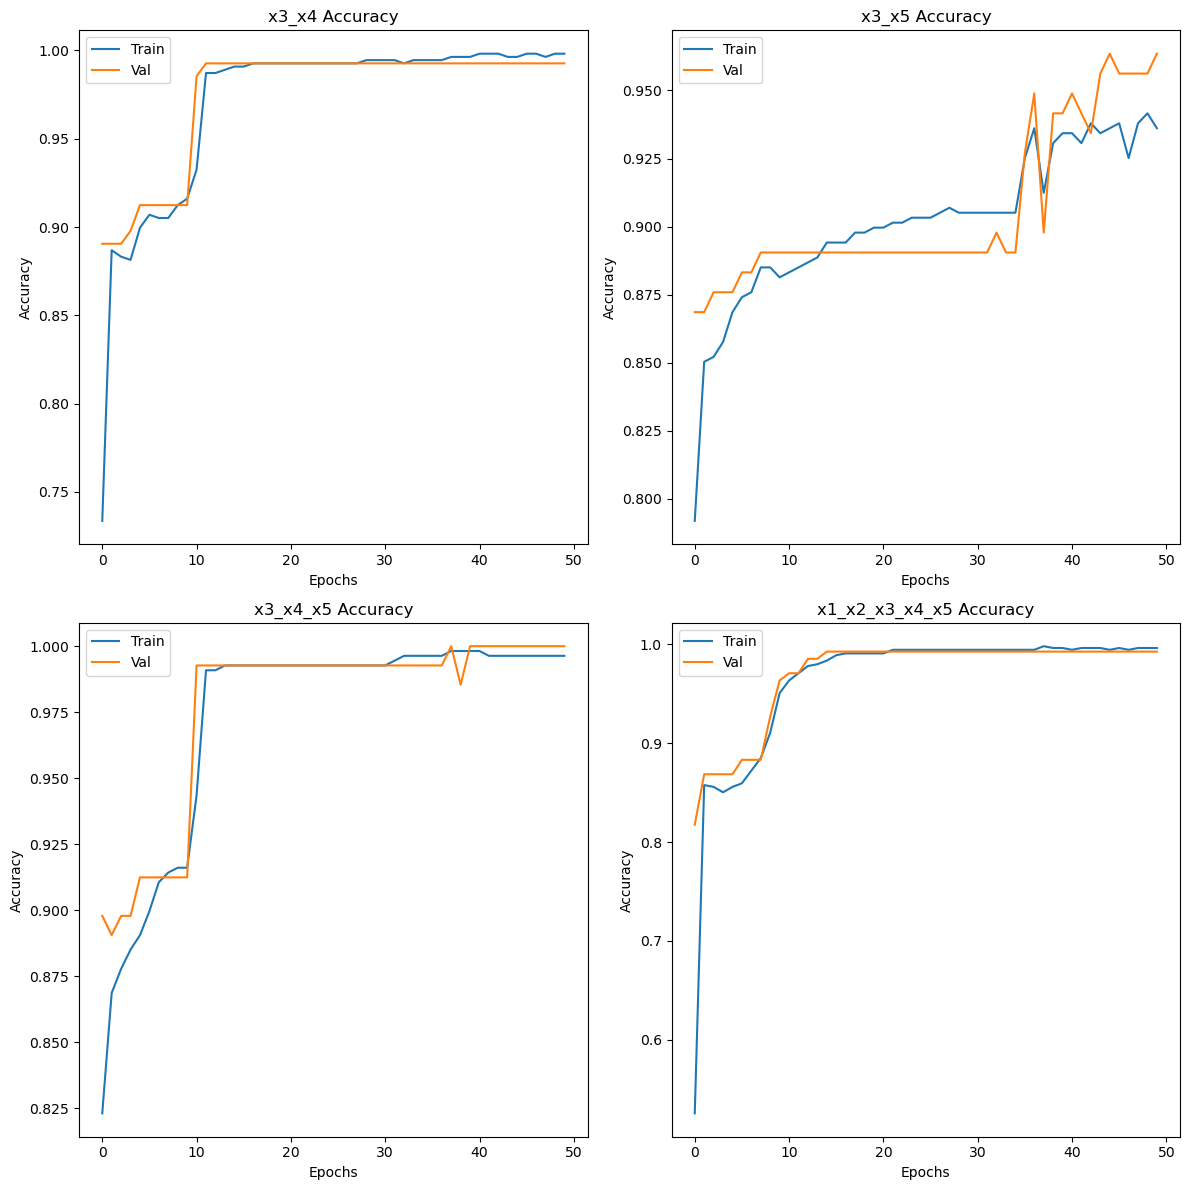

In [20]:
def plot_model_comparison(histories, model_title):
    plt.figure(figsize=(12, 12))
    
    for i, history in enumerate(histories):
        plt.subplot(2, 2, i + 1)
        plt.plot(history.history['accuracy'], label='Train')
        plt.plot(history.history['val_accuracy'], label='Val')
        plt.title(f'{model_title[i]} Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
    
    # Prevents overlap of subplots
    plt.tight_layout()
    plt.show()

# Compare histories
histories = [performance[scenario]['history'] for scenario in scenarios]
titles = [i for i in scenarios]

plot_model_comparison(histories, model_title=titles)

In [47]:
# clear variables
%reset -f

# Twitter Sentiment Analysis Dataset

In [1]:
import re
import string
import pandas as pd
from matplotlib import pyplot as plt

import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hamed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

- Analyze the dataset to understand the distribution of the three sentiment classes
and any other relevant characteristics.

In [2]:
df_train = pd.read_csv('./twitter_data/twitter_training.csv', header=None)
df_test = pd.read_csv('./twitter_data/twitter_validation.csv', header=None)

df_train.columns = ['user_id', 'topic', 'sentiment', 'review']
df_test.columns = ['user_id', 'topic', 'sentiment', 'review']

df_train.head()

,user_id,topic,sentiment,review
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


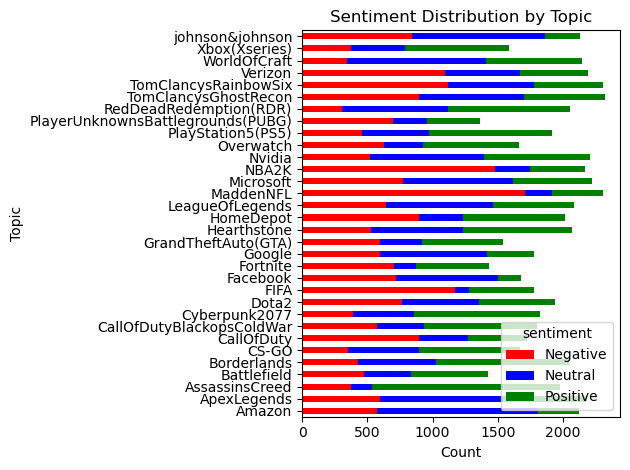

In [4]:
# remove irrelevant reviews
df_train = df_train[df_train['sentiment'] != 'Irrelevant']
df_test = df_test[df_test['sentiment'] != 'Irrelevant']

# horizontal, clustered bar plot
# count of reviews per movie by sentiment
colors = ['red', 'blue', 'green']

df_train.groupby(['topic', 'sentiment']).size().unstack().plot(kind='barh', stacked=True, color=colors)
plt.xlabel('Count')
plt.ylabel('Topic')
plt.title('Sentiment Distribution by Topic')
plt.tight_layout()
plt.show()

- Train your model using the training dataset.
- Test your model using the validation dataset.
- Ensure to pre-process the data appropriately (e.g., text cleaning, tokenization,
etc.).

In [5]:
# clean the text
def clean_text(text):
    # if text is nan, return empty string
    if pd.isnull(text):
        return ''
    
    # Convert to lowercase
    text = text.lower()  
    # remove punctuation
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    # remove numbers  
    text = re.sub(r"\d+", "", text)
    # remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  
    # remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    text = ' '.join(words)

    return text

# Apply text cleaning
df_train['clean_text'] = df_train.apply(lambda x: clean_text(x['review']), axis=1)
df_test['clean_text'] = df_test.apply(lambda x: clean_text(x['review']), axis=1)

In [6]:
# define input and labels
X_train = df_train['clean_text'].values
y_train = df_train['sentiment'].values
X_test = df_test['clean_text'].values
y_test = df_test['sentiment'].values

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers

tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)

y_pred_lr = lr_model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

    Negative       0.82      0.91      0.86       266
     Neutral       0.90      0.78      0.84       285
    Positive       0.87      0.90      0.88       277

    accuracy                           0.86       828
   macro avg       0.86      0.86      0.86       828
weighted avg       0.86      0.86      0.86       828



c:\Users\hamed\miniconda3\envs\hamed\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Number of features
input_dim = X_train_tfidf.shape[1]  

nn_model = Sequential()
nn_model.add(Dense(64, input_dim=input_dim, activation='relu'))
nn_model.add(Dropout(0.5))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(3, activation='softmax'))  # 3 classes

# using categorical_crossentropy loss function causes
# ValueError: Arguments `target` and `output` must have the same rank (ndim).
# Use sparse_categorical_crossentropy instead.
nn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
nn_model.fit(X_train_tfidf.toarray(), y_train_encoded, epochs=10, batch_size=64, validation_data=(X_test_tfidf.toarray(), y_test_encoded))

# Evaluate the model
loss, accuracy = nn_model.evaluate(X_test_tfidf.toarray(), y_test_encoded)
print(f'Neural Network Test Accuracy: {accuracy}')


c:\Users\hamed\miniconda3\envs\hamed\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
964/964 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5920 - loss: 0.8731 - val_accuracy: 0.8744 - val_loss: 0.3723
Epoch 2/10
964/964 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8032 - loss: 0.4901 - val_accuracy: 0.9312 - val_loss: 0.2349
Epoch 3/10
964/964 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8589 - loss: 0.3605 - val_accuracy: 0.9444 - val_loss: 0.1836
Epoch 4/10
964/964 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8819 - loss: 0.2900 - val_accuracy: 0.9517 - val_loss: 0.1554
Epoch 5/10
964/964 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8995 - loss: 0.2479 - val_accuracy: 0.9541 - val_loss: 0.1407
Epoch 6/10
964/964 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9067 - loss: 0.2197 - val_accuracy: 0.9541 - val_loss: 0.1319
Epoch 7/10
964/964 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9123 - loss: 0.2040 - val_accuracy: 0.9650 - val_loss: 0.1314
Epoch 8/10
964/964 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9166 - loss: 0.1889 - val_accuracy: 0

In [13]:
import numpy as np
# view classifcation report
# Use predict and convert probabilities to class labels
y_pred_nn = np.argmax(nn_model.predict(X_test_tfidf.toarray()), axis=-1)

# View classification report
print(classification_report(y_test_encoded, y_pred_nn))

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       266
           1       0.98      0.95      0.96       285
           2       0.95      0.97      0.96       277

    accuracy                           0.96       828
   macro avg       0.96      0.96      0.96       828
weighted avg       0.96      0.96      0.96       828



In [15]:
nn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │       320,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 966,731 (3.69 MB)

 Trainable params: 322,243 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 644,488 (2.46 MB)

In [34]:
from tensorflow.keras import regularizers
# increase number of neurons in the hidden layers
# but maintain dropout rate
# Also add a regularization term to the last hidden layer

nn_model = Sequential()
nn_model.add(Dense(64, input_dim=input_dim, activation='relu'))
nn_model.add(Dropout(0.3))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dropout(0.3))
nn_model.add(Dense(3, activation='softmax'))

# using categorical_crossentropy loss function causes
# ValueError: Arguments `target` and `output` must have the same rank (ndim).
# Use sparse_categorical_crossentropy instead.
nn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
nn_model.fit(X_train_tfidf.toarray(), y_train_encoded, epochs=10, batch_size=64, validation_data=(X_test_tfidf.toarray(), y_test_encoded))

# Evaluate the model
loss, accuracy = nn_model.evaluate(X_test_tfidf.toarray(), y_test_encoded)
print(f'Neural Network Test Accuracy: {accuracy}')

Epoch 1/10
964/964 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5977 - loss: 0.8668 - val_accuracy: 0.8877 - val_loss: 0.3658
Epoch 2/10
964/964 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8113 - loss: 0.4777 - val_accuracy: 0.9275 - val_loss: 0.2256
Epoch 3/10
964/964 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8740 - loss: 0.3325 - val_accuracy: 0.9553 - val_loss: 0.1600
Epoch 4/10
964/964 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9037 - loss: 0.2493 - val_accuracy: 0.9614 - val_loss: 0.1390
Epoch 5/10
964/964 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9224 - loss: 0.1944 - val_accuracy: 0.9614 - val_loss: 0.1258
Epoch 6/10
964/964 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9329 - loss: 0.1655 - val_accuracy: 0.9722 - val_loss: 0.1139
Epoch 7/10
964/964 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9351 - loss: 0.1508 - val_accuracy: 0.9662 - val_loss: 0.1321
Epoch 8/10
964/964 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9408 - loss: 0.1375 - val_accuracy: 0.

In [35]:
accuracy, loss

(0.9698067903518677, 0.14222416281700134)